In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

plt.style.use('dark_background')

df = pd.read_csv('../input/-dark-souls-3-weapon/DS3_weapon.csv')

That's how our table looks like

In [ ]:
df.head()

#### Visualisation

Let's see the amount of weapons by category.

In [ ]:
sns.barplot(x='Category', y='index', data=df['Category'].value_counts().reset_index());
plt.ylabel('Weapon Category');
plt.xlabel('Count');

Let's see how the weight of weapon distributed

In [ ]:
sns.histplot(data=df, x='Weight', bins=30);

In [ ]:
df['weight_category'] = pd.cut(df['Weight'], [-1, 5, 15, 30], labels=['Light', 'Medium', 'Heavy'])

Here's weapon damage distribution according to minimal required level to use. We can see that weapon damage goes up with required level.

In [ ]:
df['total_damage'] = df['Damage'].str.split('/', expand=True).astype('int').to_numpy().sum(axis=1)

df['minimum_lvl_requirement'] = df['Stat Requirements'].str.split('/', expand=True).astype('int').sum(axis=1)
df['lvl_category'] = pd.cut(df['minimum_lvl_requirement'], [-1, 30, 60, 90], labels=['Start Game', 'Mid Game', 'Late Game'])

In [ ]:
sns.histplot(data=df, x='total_damage', hue='lvl_category', bins=30);

We can see that there is one start game weapon with quite high damage. Let's see what it is.

In [ ]:
df[(df['lvl_category'] == 'Start Game') & (df['total_damage'] > 200)]

That's a Dark Hand weapon. Quite strong weapon for start game.

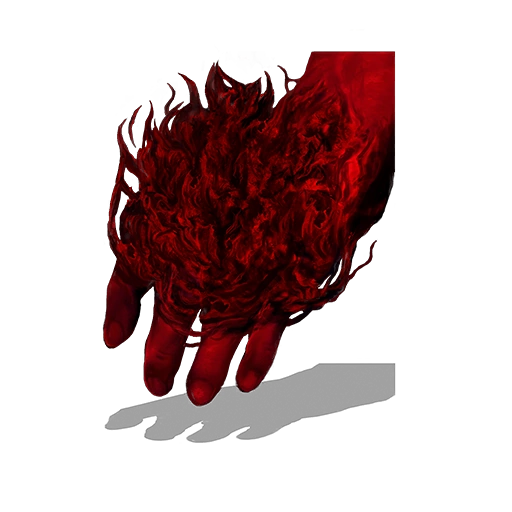